In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # 스케일링

# 검증세트
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42)

In [6]:
# 모델 생성
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size = 3, 
                              activation = 'relu', padding = 'same',
                              input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64, kernel_size = (3, 3), 
                              activation = 'relu', padding = 'same'))
model.add(keras.layers.MaxPooling2D(2))

# 밀집층
model.add(keras.layers.Flatten()) # 앞에서 처리함
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [7]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(train_scaled, train_target, epochs = 10)

Train on 48000 samples
Epoch 1/10
48000/48000 [==============================] - 28s 576us/sample - loss: 0.5232 - accuracy: 0.8114
Epoch 2/10
48000/48000 [==============================] - 28s 580us/sample - loss: 0.3481 - accuracy: 0.8730
Epoch 3/10
48000/48000 [==============================] - 28s 586us/sample - loss: 0.2995 - accuracy: 0.8925
Epoch 4/10
48000/48000 [==============================] - 27s 569us/sample - loss: 0.2649 - accuracy: 0.9039
Epoch 5/10
48000/48000 [==============================] - 29s 602us/sample - loss: 0.2402 - accuracy: 0.9128
Epoch 6/10
48000/48000 [==============================] - 27s 567us/sample - loss: 0.2179 - accuracy: 0.9212
Epoch 7/10
48000/48000 [==============================] - 27s 563us/sample - loss: 0.2001 - accuracy: 0.9266
Epoch 8/10
48000/48000 [==============================] - 28s 575us/sample - loss: 0.1850 - accuracy: 0.9308
Epoch 9/10
48000/48000 [==============================] - 26s 549us/sample - loss: 0.1728 - accuracy: 0.9

In [8]:
from PIL import Image

In [17]:
image = Image.open("D:/python3/data/number_7.png")
import matplotlib.pyplot as plt
%matplotlib inline

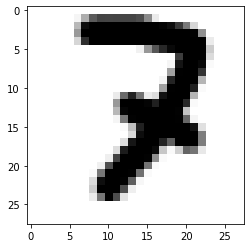

In [18]:
plt.imshow(image)

In [19]:
image.size

(28, 28)

In [24]:
import numpy as np
image = ((np.array(image) / 255) -1)*1 

In [28]:
image = np.reshape(image, (1, 28, 28, 1))

In [31]:
a = model.predict(image)
a

array([[1.5882275e-25, 0.0000000e+00, 3.6138855e-28, 0.0000000e+00,
        0.0000000e+00, 1.6043654e-01, 2.7719736e-27, 4.8340098e-37,
        8.3956343e-01, 0.0000000e+00]], dtype=float32)

In [30]:
max(a[0])

0.8395634

In [32]:
list(a[0]).index(max(a[0]))

8